In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load and split data

In [140]:
data=pd.read_csv('patient_data.csv')
data.head(5)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out


#### Label encoding

In [141]:
# 1= patient requires incare , 0 = patient doent require incare
data['SOURCE']= data.SOURCE.replace({"in":1, "out":0})

#store the features
features = [i for i in data.columns if i != 'SOURCE']

X=data[features] #feature set
y=data["SOURCE"] #target

#train:test ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, 
                                                    stratify=y)
X_train.shape , X_test.shape


C:\Users\Smit\AppData\Local\Temp\ipykernel_10548\544547054.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SOURCE']= data.SOURCE.replace({"in":1, "out":0})


((3088, 10), (1324, 10))

# Exploratory Data analysis

In [142]:
features_num=[i for i in features if data[i].dtype != object]
features_catg= [i for i in features if data[i].dtype == object]
print(f"dataset has {data.shape[0]} rows and {data.shape[1]} columns")
print (f"total features : {len(features)}")
print (f"numerical features : {len(features_num)}")
print (f"categorical features : {len(features_catg)}\n")


dataset has 4412 rows and 11 columns
total features : 10
numerical features : 9
categorical features : 1



#### missing values

In [143]:
data.isna().mean().to_frame(name='Missing values %')

,Missing values %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


#### Unique values 

In [144]:
#count unique values in each features
data.nunique().to_frame(name='num of unique values')

,num of unique values
HAEMATOCRIT,326
HAEMOGLOBINS,128
ERYTHROCYTE,433
LEUCOCYTE,276
THROMBOCYTE,554
MCH,189
MCHC,105
MCV,406
AGE,95
SEX,2


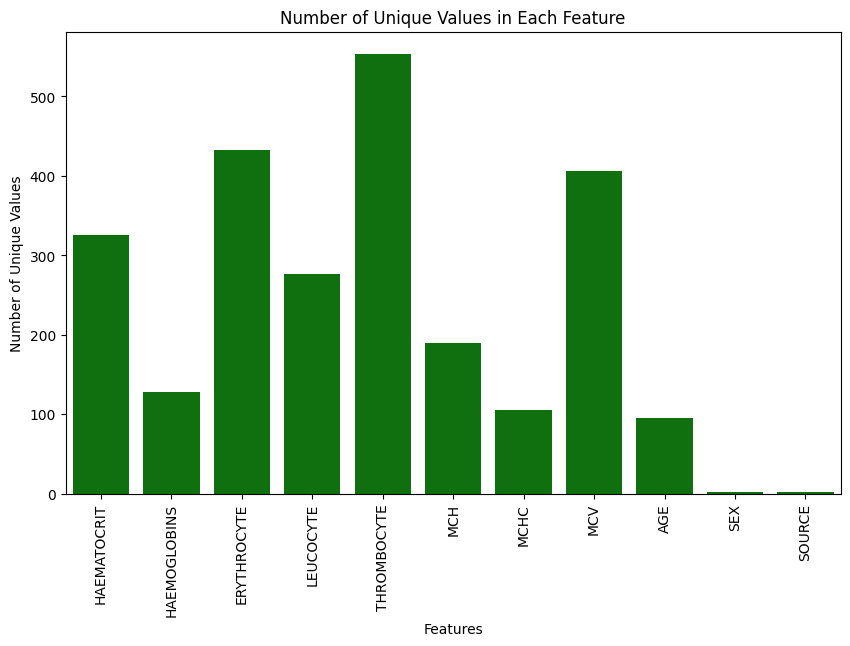

In [145]:

# data.nunique() calculates the number of unique values for each feature
# .to_frame(name='num of unique values') converts the Series to a DataFrame with a specified column name
unique_values_df = data.nunique().to_frame(name='num of unique values')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=unique_values_df.index, y=unique_values_df['num of unique values'], color='green')
plt.xlabel('Features')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Feature')
plt.xticks(rotation=90)
plt.show()


In [146]:
data[features_num].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


#### Box plot for each numerical feature

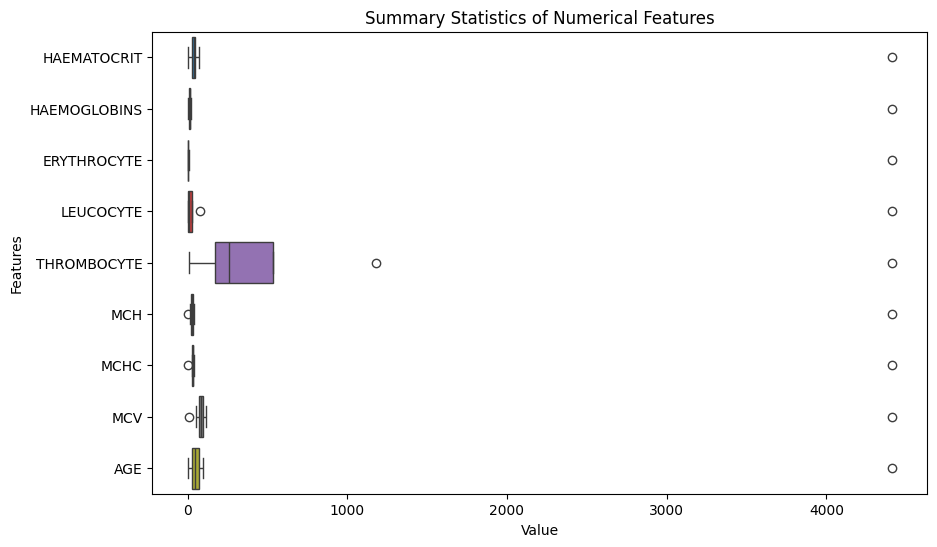

In [147]:

summary_stats = data[features_num].describe()

plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_stats, orient='h')
plt.title('Summary Statistics of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()


#### Categorical features

C:\Users\Smit\AppData\Local\Temp\ipykernel_10548\98405991.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x="SEX", data=data, ax=axes[1], palette=['green', 'orange'])


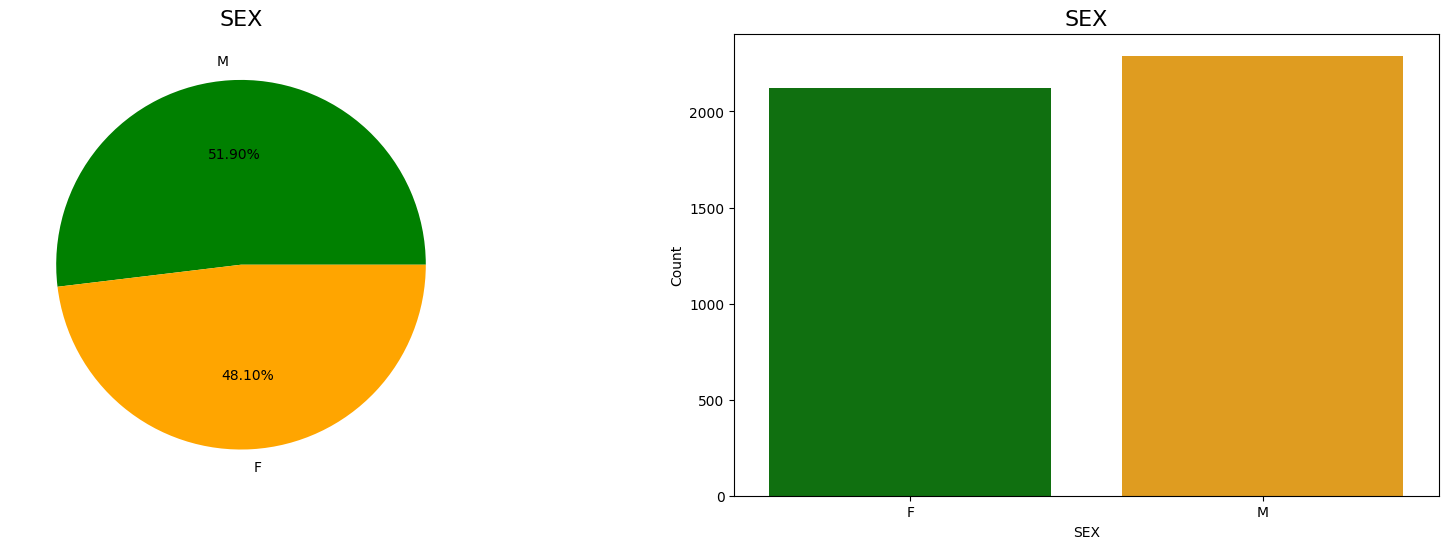

In [111]:
# Create a figure and axes with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Pie chart (ax=axes[0])
df_sex = data['SEX'].value_counts()
barplot = df_sex.plot(kind='pie', ax=axes[0], autopct="%.2f%%", colors=['green', 'orange'])
barplot.set_ylabel('')  # Remove the y-label
barplot.set_title('SEX', fontsize=16)

# Count plot (ax=axes[1])
countplot = sns.countplot(x="SEX", data=data, ax=axes[1], palette=['green', 'orange'])
countplot.set_ylabel('Count')  # Set the y-label
countplot.set_title('SEX', fontsize=16)

# Show the plots
plt.show()


#### Bar plot


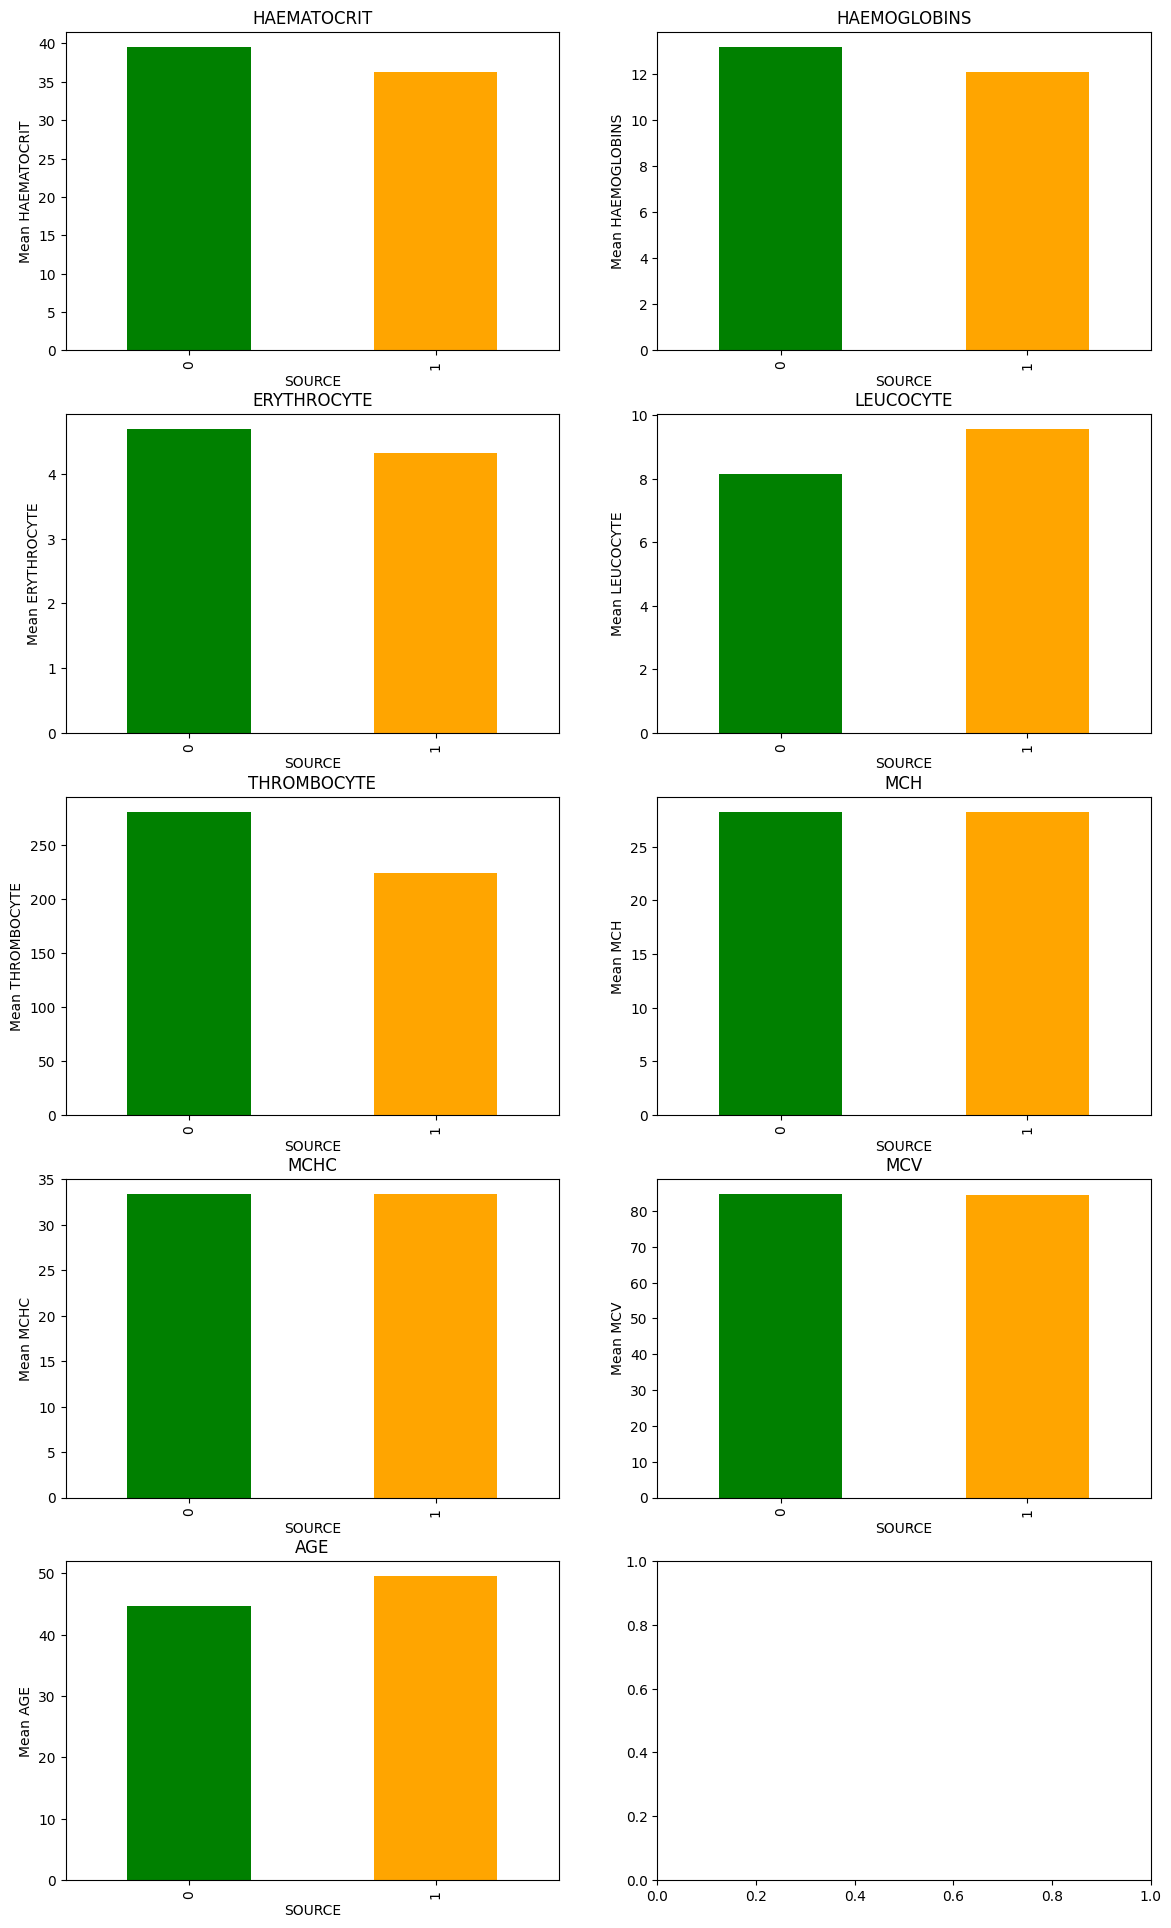

In [112]:
# Relationship between taget and mean of each numerical features

fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[features_num]):
    df = data.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}', color=('green','orange'))


In [113]:
# On average, The quantity of HAEMOTOCRIT, HAEMOGLOBINS, ERYTHROCYTE, and THROMBOCYTE features are lesser in In care patients.
# MCH, MCHV, MCV are less informative to differentiate classes
# The mean age of Incare patients is greater than the Outcare patients.

#### Correlation-matrix

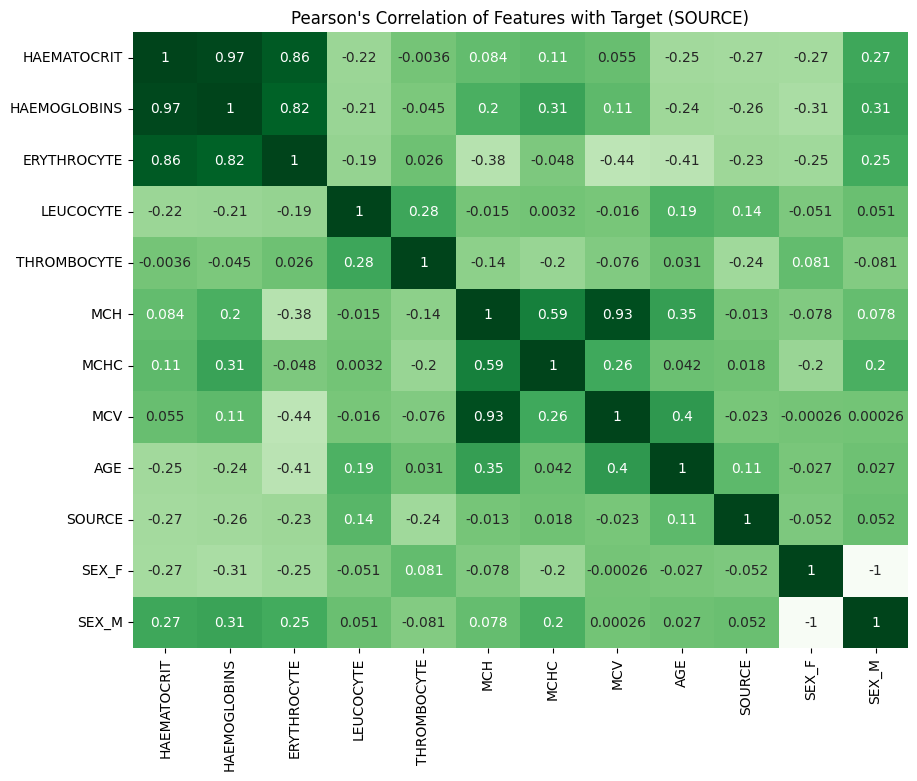

In [114]:
# Pearson's Correlation of features w.r.t target

# corr_matt = data.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
# plt.figure(figsize=(3,5))
# corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Compute the correlation matrix
corr_matrix = data_encoded.corr(method='pearson')

# Sort the correlation values with respect to the 'SOURCE' feature
corr_with_target = corr_matrix['SOURCE'].sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', cbar=False)
plt.title("Pearson's Correlation of Features with Target (SOURCE)")
plt.show()


In [115]:
#leucocytes and age are positively correlated wit target
#thrombocytes, erythrocyte,haemoglobins and haematocrit are negatively corelated with target
#mchc, mch, mcv are not much co related with target

#### Categorical features


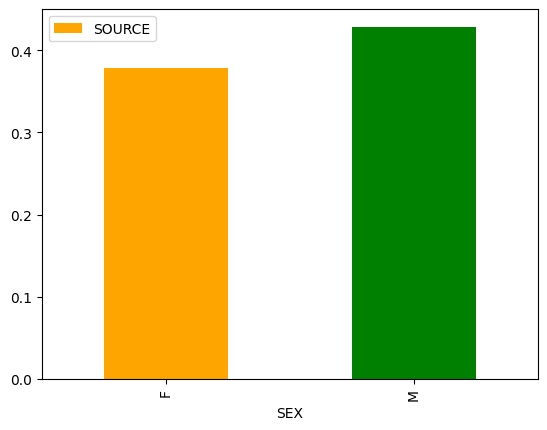

In [116]:
df = data.groupby('SEX')['SOURCE'].mean().to_frame().reset_index()
plot = df.plot(kind='bar', x='SEX', y='SOURCE', color=('orange', 'green'))

# Feature Engineering


#### Label Encoding

#### Feature Scaling

In [118]:
#scale the features to a range of [0, 1] using MINMAXSCALER
scaler=MinMaxScaler(feature_range=(0,1))
X_train[features_num]=scaler.fit_transform(X_train[features_num]) #fit&transform train set
X_test[features_num]=scaler.transform(X_test[features_num]) #transform test set

In [119]:
#pre-processed data
X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
1213,0.542725,0.600000,0.465517,0.077052,0.249362,0.536680,0.646154,0.480519,0.306122,1
2227,0.431871,0.433333,0.426332,0.068677,0.434043,0.370656,0.446154,0.375000,0.479592,0
3321,0.420323,0.446667,0.316614,0.125628,0.146383,0.583012,0.530769,0.602273,0.642857,1


# Feature Selection

In [120]:
X_train.drop (['MCH', 'MCHC','MCV'], axis=1, inplace=True)
X_test.drop (['MCH','MCHC','MCV'], axis=1, inplace=True)
X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,AGE,SEX
1213,0.542725,0.600000,0.465517,0.077052,0.249362,0.306122,1
2227,0.431871,0.433333,0.426332,0.068677,0.434043,0.479592,0
3321,0.420323,0.446667,0.316614,0.125628,0.146383,0.642857,1


# Logistic Regression

In [121]:
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
print("Train accuracy: ", accuracy_score(y_train,logreg.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test,logreg.predict(X_test)))

Train accuracy:  0.7117875647668394
Test accuracy: 0.7152567975830816


In [122]:
# hyperparameter tuning for logistic regression

In [136]:
param_grid={'C':[0.001,0.01,0.1,10,100,1000],
           'penalty':['l1','l2','elasticnet','none'],
           'fit_intercept':[True,False],
           'max_iter':[100,200,300],
           'class_weight':[{0:1,1:1}, {0:1,1:2},{0:1,1:4},{0:1,1:5}]
           }
search=RandomizedSearchCV(LogisticRegression(random_state=1),
                         param_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=30)
search.fit(X_train, y_train)

#searching for best parameters for Log Reg classifier
print ("Best parameters: ", search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters:  {'penalty': 'l2', 'max_iter': 200, 'fit_intercept': False, 'class_weight': {0: 1, 1: 1}, 'C': 10}


C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", l

In [137]:
# Retrain with best model

best_logreg = search.best_estimator_

best_logreg.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_logreg.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_logreg.predict(X_test)))

Best train accuracy :  0.6868523316062176
Best test accuracy :  0.6903323262839879


In [138]:
print(classification_report(y_test, best_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       789
           1       0.69      0.42      0.52       535

    accuracy                           0.69      1324
   macro avg       0.69      0.65      0.65      1324
weighted avg       0.69      0.69      0.67      1324



# Random Forest Classifier

In [126]:
forest=RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)
print("Train accuracy:", accuracy_score(y_train,forest.predict(X_train)))
print("Test accuracy: ", accuracy_score(y_test,forest.predict(X_test)))

Train accuracy: 1.0
Test accuracy:  0.7484894259818731


In [127]:
#hyperparameter tuning

In [131]:
# Hyperparameters
params_grid = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [50, 100, 150, 200]}

# Random search for best hyperparameters
search = RandomizedSearchCV(RandomForestClassifier(random_state=1),
                         params_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=20)

search.fit(X_train, y_train)

# Best parameters for Random forest classifier
search.best_params_


Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Smit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", l

{'n_estimators': 150,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [132]:
#Retrain with best model

best_forest = search.best_estimator_

best_forest.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_forest.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_forest.predict(X_test)))

Best train accuracy :  0.8497409326424871
Best test accuracy :  0.7439577039274925


In [133]:
print(classification_report(y_test, best_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       789
           1       0.72      0.60      0.65       535

    accuracy                           0.74      1324
   macro avg       0.74      0.72      0.73      1324
weighted avg       0.74      0.74      0.74      1324

